# ISYE 6501 Homework #5

## Jeremy Wong | kwong301@gatech.edu

# Question 8.1

Describe a situation or problem from your job, everyday life, current events, etc., for which a linear regression model would be appropriate. List some (up to 5) predictors that you might use.

# Answers to 8.1

Despite its simplicity, linear regression models are used in various fields, including finance (e.g. CAPM and beta analysis), social science research (because of its interpretability), and sports. As a matter of fact, much analysis in the famous Moneyball analysis in professional baseball was conducted [using linear regerssion models](https://kharshit.github.io/blog/2017/07/28/moneyball-how-linear-regression-changed-baseball). Despite the rapid development of better fitting (deep) machine learning models, I imagine that linear regression models still play a big role this day because of their interpretability which translates to clearcut implications on management and coaching decisions.

As an avid NBA fan, I'd like to take this opportunity to explore the depth of professional basketball players using the R package [`nbastatR`](https://www.rdocumentation.org/packages/nbastatR/versions/0.1.1505). As a starter, I would like to fit a model to predict players' win shares. Win share is a metric that attempts to divvy up credit for team success to the individuals on the team. Check [here](https://www.basketball-reference.com/about/ws.html) for detailed calculations. This is  nothing novel, for example, [this kaggle notebook](https://www.kaggle.com/cenzio/predicting-nba-player-win-shares) has an excellent demonstration of implement WS regression with the aid of PCA.

The Win Shares is available at any point of the season, the calculation formula and statstics are readily available from web sites like [basketball-reference](https://www.basketball-reference.com/). Why regress? One value of this exercise is an attempt to break down this advance statistic (which we trust that it represents valuation in terms of winning) in terms of more tangible statistics like points, rebounds, 3 point attempts etc. This could help laymen understand what relative importantance of each stat, and possibly facilitate communications between coaches and players - it is more intuitive to tell a player to "shoot more 3s", rather than "boost your marginal defense". We'll include player data for the previous 3 seasons.

- Offensive/Defensive Rebound
- Turnover
- Personal Fouls
- Blocks
- Steals
- 2 point attempts/made
- 3 point attempts/made
- Free Throw attempts/made

We don't include points because it is perfectly collinear with 2/3 FG made. Statistics are normalized by playing time.

I actually implemented the regression for the __guard__ positions (guards, forwards and centers play differently so I intend to subset by positions), and got a R squared as high as 95.8%, which is not surprising because advanced stats that are used to calculate win shares most likely depend on the same set of variables. Overall, signs are as expected. It is particularly interested to see how the shooting 3's is rewarded in win shares: notice that each attempt contributes -0.0227555 whereas each made attempt contributes 0.0732370. Break even shooting percentage is 31.07%. Whereas the same break-even perctage is 51.4% for 2 point field goals. The 3 point and 2 point shooting percentage for the average guard player are 32.00% and 44.87%. So a guard player really needs to shoot around the peer average in 3 points to generate gains for the team (in terms of WS).

__Some possible extensions:__ With the richness and breadth of this NBA dataset we can also do the regression on a [team level](https://towardsdatascience.com/predicting-nba-win-percentage-84148ae8d3e6) by considering the number of wins/win pct on stats. It would be interesting to see how the regression coefficients change and what that reflects on the change of playing style and pace. Check [here](https://rpubs.com/ho-ian/nbaplayereval) for another analysis on player valuation with cool visualization.

In [149]:
library("nbastatR")
library("highcharter")
library("magrittr")
library(data.table)

options(warn=-1)

player_stats <- bref_players_stats(seasons=c(2018, 2019, 2020, 2021), return_message=FALSE)
player_stats %<>% data.table 

regr <- c('fg2aTotals',
          'fg3aTotals',
          'fg2mTotals',
          'fg3mTotals',
          'ftmTotals',
          'orbTotals',
          'drbTotals',
          'astTotals',
          'stlTotals',
          'blkTotals',
          'tovTotals',
          'pfTotals')

regr_pm <- c()

for (v in regr) {
    var <- strsplit(v, 'Totals')[[1]]
    var <- paste0(var, 'Per48')
    regr_pm <- c(regr_pm, var)
    player_stats[, var] = player_stats[, v, with=FALSE] * 48 / player_stats[, minutesTotals]
}

formula <- paste("ratioWSPer48 ~ ", paste(regr_pm, collapse =" + ") ,sep = "")
summary(lm(formula, data=player_stats, subset = groupPosition =="G"))

Advanced
Totals



Call:
lm(formula = formula, data = player_stats, subset = groupPosition == 
    "G")

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40081 -0.01302 -0.00042  0.01440  0.31085 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0219655  0.0047057  -4.668 3.51e-06 ***
fg2aPer48   -0.0203570  0.0005147 -39.550  < 2e-16 ***
fg3aPer48   -0.0227555  0.0004162 -54.680  < 2e-16 ***
fg2mPer48    0.0396396  0.0008896  44.557  < 2e-16 ***
fg3mPer48    0.0732370  0.0006943 105.476  < 2e-16 ***
ftmPer48     0.0139382  0.0004474  31.155  < 2e-16 ***
orbPer48     0.0136461  0.0010961  12.450  < 2e-16 ***
drbPer48     0.0036228  0.0004492   8.065 2.35e-15 ***
astPer48     0.0104769  0.0003324  31.518  < 2e-16 ***
stlPer48     0.0137408  0.0010035  13.693  < 2e-16 ***
blkPer48     0.0050212  0.0019940   2.518    0.012 *  
tovPer48    -0.0274638  0.0006204 -44.267  < 2e-16 ***
pfPer48     -0.0007774  0.0005098  -1.525    0.128    
---
Signif. codes:  0 '**

# Question 8.2

Using crime data from http://www.statsci.org/data/general/uscrime.txt  (file `uscrime.txt`, description at http://www.statsci.org/data/general/uscrime.html), use regression (a useful R function is `lm` or `glm`) to predict the observed crime rate in a city with the following data:

M = 14.0
<br>So = 0
<br>Ed = 10.0
<br>Po1 = 12.0
<br>Po2 = 15.5
<br>LF = 0.640
<br>M.F = 94.0
<br>Pop = 150
<br>NW = 1.1
<br>U1 = 0.120
<br>U2 = 3.6
<br>Wealth = 3200
<br>Ineq = 20.1
<br>Prob = 0.04
<br>Time = 39.0

Show your model (factors used and their coefficients), the software output, and the quality of fit. 

__Note__ that because there are only 47 data points and 15 predictors, you’ll probably notice some overfitting.  We’ll see ways of dealing with this sort of problem later in the course.

# Answers to 8.2

We used `glm` to build linear regression models predict the observed crime rate. We will cover model selection in the following steps:

1. Come up model candidates:
    - From data transformation
    - From variable selection
2. Diagnostics for comparisons
    - CV and information criterion
    - LR test for nested models
    - Residual QQ plots and normality tests

## Summary and Conclusion

- We found serious multi-collinearity in the data, which are undesirable for running linear regression models.
- The benchmark model has good R squared, but has very wide confidence intervals and is prone to overfitting.
- We first introduce an interpretive sequential model selection routine: first we identify the multicollinear model, take out the most serious two predictors, and then drop other variables iteratively. The order for which these variables are dropped depend on the users' knowledge and interpretation of the data generating process.
- Using an elbow method on R squared, we ended up selecting the model with Po2, Wealth, and U1 dropped. This model passes the likelihood ratio test.
- On the other hand, we considered Lasso regression. The regularization parameter was tuned with leave-one-out CV.
- We run LOOCV for the first model, eventually. Here's the model comparison:

|                     | Interpretive | Lasso |
|---------------------|:------------:|:-------:|
| In-sample R Squared |     0.781    |  0.753  |
| CV Sum of Errors    |     72665    |  65871  |

- The QQ plots for Lasso residuals are also more normal than the Interpretive model. We ended up selecting the Lasso model.
- So to sum up the predicted crime in the question, as required, are: 1225.23 by the interpretative model, and 903.78 by the Lasso model.

# Details to answer

## 1. Data Description

In `uscrime`, we are given dataset with 16 variables for 47 US states in 1960. According to this [documentation](https://www.rdocumentation.org/packages/MASS/versions/7.3-53/topics/UScrime), these variables in include:

`M`: percentage of males aged 14--24.
<br>`So`: indicator variable for a Southern state.
<br>`Ed`: mean years of schooling.
<br>`Po1`: police expenditure in 1960.
<br>`Po2`: police expenditure in 1959.
<br>`LF`: labour force participation rate.
<br>`M.F`: number of males per 1000 females.
<br>`Pop`: state population.
<br>`NW`: number of non-whites per 1000 people.
<br>`U1`: unemployment rate of urban males 14--24.
<br>`U2`: unemployment rate of urban males 35--39.
<br>`GDP`: gross domestic product per head.
<br>`Ineq`: income inequality.
<br>`Prob`: probability of imprisonment.
<br>`Time`: average time served in state prisons.
<br>`Crime`: rate of crimes in a particular category per head of population.

### 1.1 Visualization

We use the `chart.correlation` function to visualize the dataset. Please __double click__ the chart to enlarge. Off-diagonal fitted red lines are [likely from `lowess` package](https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another), which does local regression. One red flag is that we see several pairs of highly collinear variables. In general, collinear variables are undesirable. They tend absorb each other's explaining power in model parameters, leading to imprecise estimates (high standard errors) and inaccurate predictions.

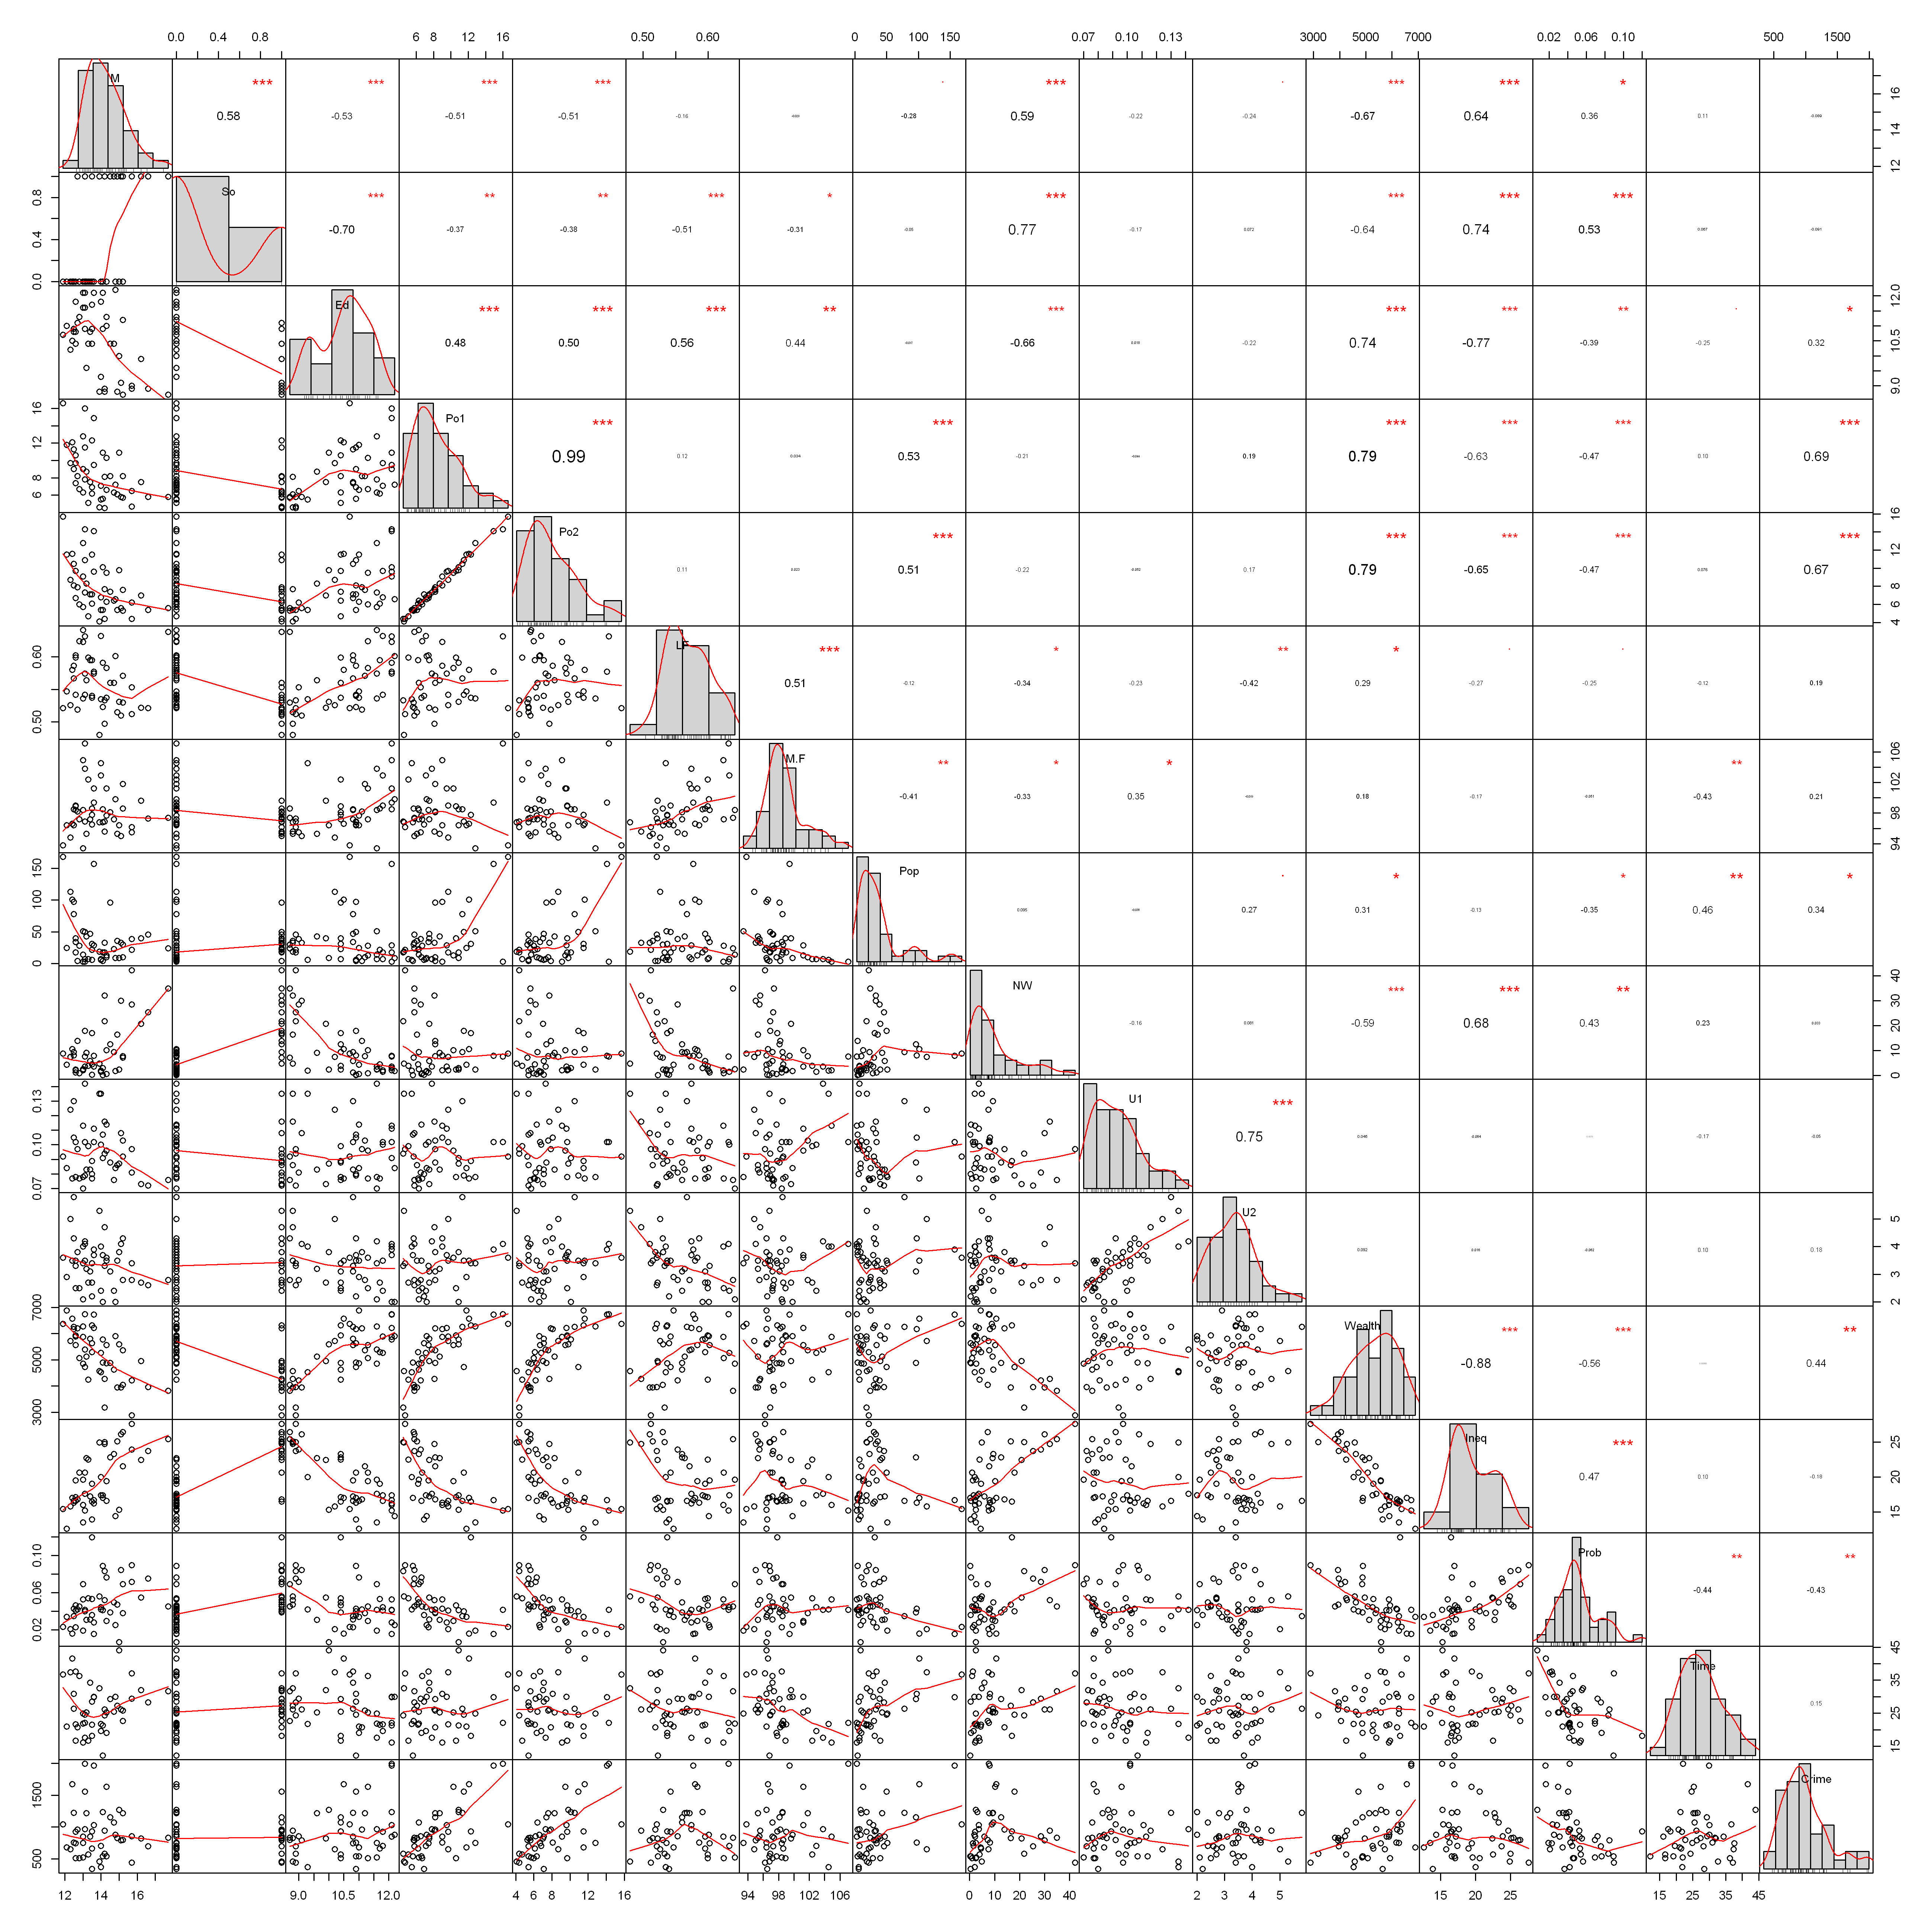

In [226]:
library(PerformanceAnalytics)

crime_dta <- fread('./hw5/uscrime.txt') %>% data.table

figsize <- 300
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)

chart.Correlation(crime_dta)

## 2. Benchmark Regression

We first look at the benchmark, a linear regression of `Crime` on the rest of variables. Perhaps, one can justify removal of certain variables on the basis of overfitting and collinearity, yet from a perspective of interpretive modeling, it makes socio-economic sense to include any of the above the variables to a model that describes crime rate. For example, one could justify including `Prob` in the model because theoretically higher cost of committing crime deters crime activities, according to [Gary Becker](https://www.econlib.org/library/Enc/bios/Becker.html).

Even though we achieved a good R-squared at 0.80, we note that there are two drawbacks exhibited by this model. First, we see from below that a number of regressors are insignificant, which is expected from two reasons:
1. Predictors are highly collinear, so the model is not able to separately identify their the individual marginal effects with reasonable power.
2. The data is rather small. In general, a rule thumb is to have [about 10-20 observations for each regressor](https://stats.stackexchange.com/questions/29612/minimum-number-of-observations-for-multiple-linear-regression) for the model to able to detect reasonable-size effects. We have 15 regressors, but only 47 observations.

Insignficance of estimates lead to wide confidence interval and renders predictions imprecise, if not meaningless. Second, as noted in the question, the sample size is rather small relative to the number of model parametesr which makes the model prone to overfitting.

Nonetheless, the QQ plot for residuals look sufficiently normal, with a p-value 0.78 for the Shapiro-Wilk's test for normality. Even though the test is known to favor small samples, 0.78 is still pretty high. Normality is desirable because [inference of small data will rely on the normality assumption](https://stats.stackexchange.com/questions/395011/why-normality-assumption-in-linear-regression), and also it connects the least squares estimator with maximum likelihood, which makes our model training more statistically sound.

In [234]:
regr <- names(crime_dta[, -'Crime'])
formula <- paste("Crime ~ ", paste(regr, collapse =" + ") ,sep = "")

benchmark_reg <- lm(formula, data=crime_dta, family = gaussian)
summary(benchmark_reg)


Call:
lm(formula = formula, data = crime_dta, family = gaussian)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 


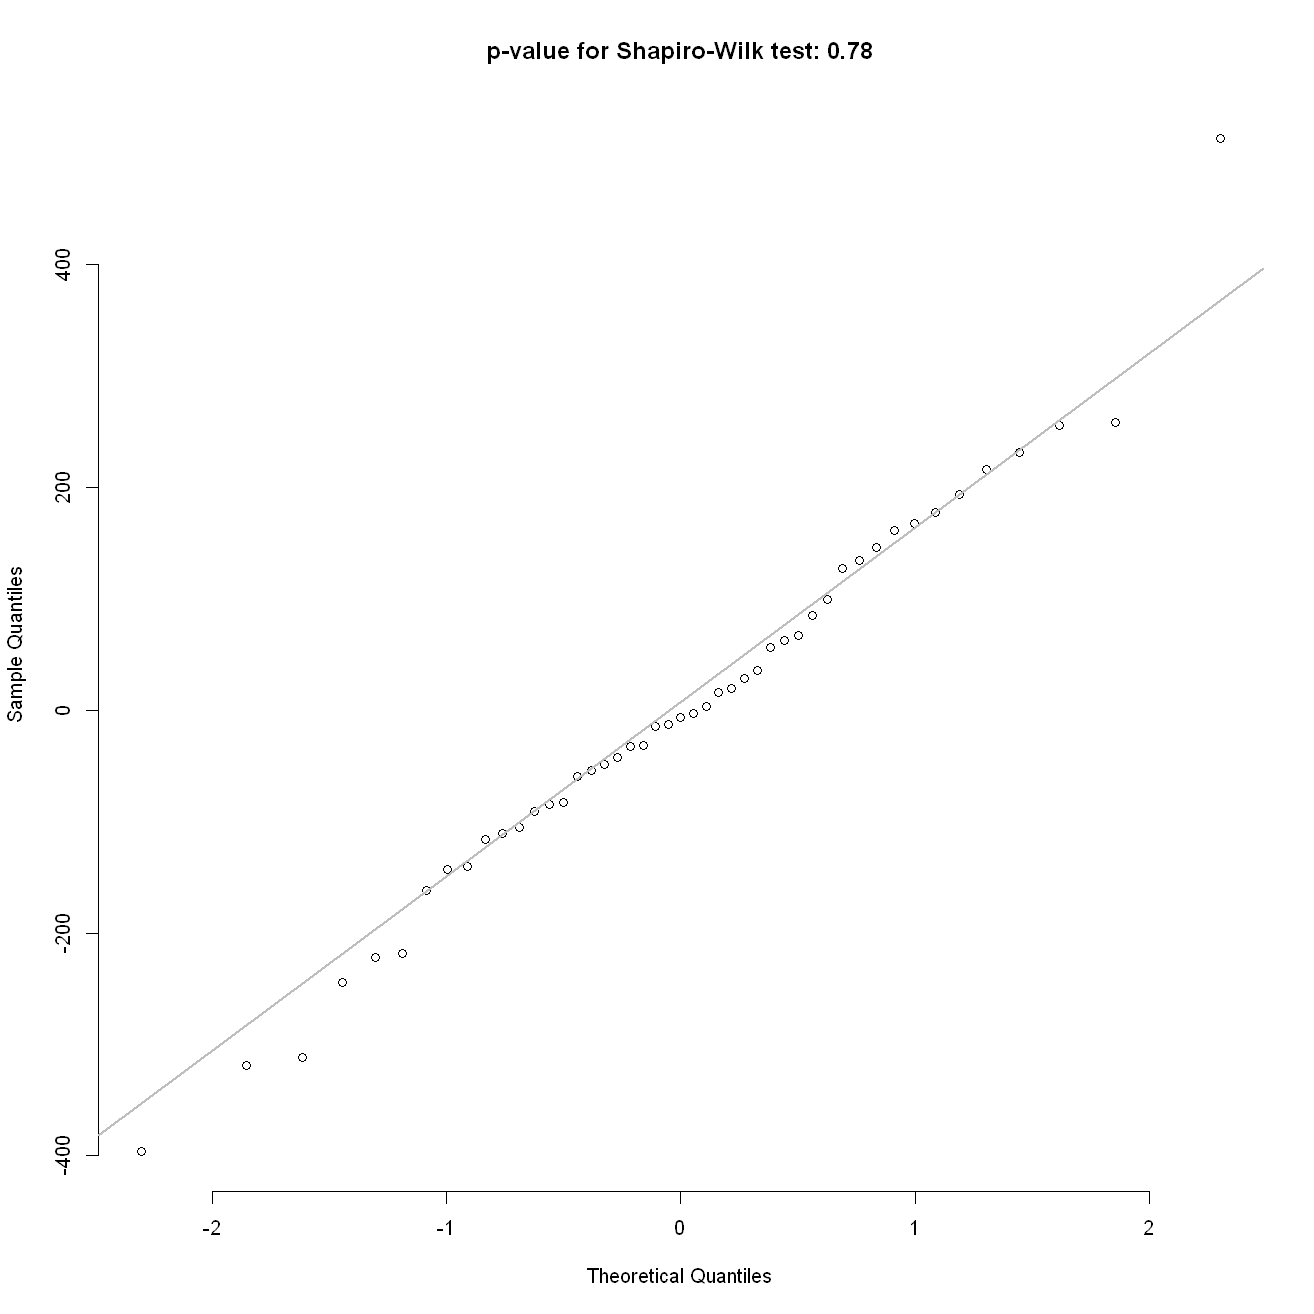

In [230]:
figsize <- 120
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)

title <- paste0('p-value for Shapiro-Wilk test: ', shapiro.test(benchmark_reg$resid)$p.value %>% round(2))
qqnorm(benchmark_reg$resid, pch = 1, main=title, frame = FALSE)
qqline(benchmark_reg$resid, col = "grey", lwd = 2)

## 3. Interpretive Model Selection

We propose two approaches to improve the model: dimensionality reduction and data transformation. This section covers a model selection routine that relies on interpretive reasoning.

### 3.1 Interpretive Variable Selection

First, revisiting the correlation plot again, we see a number of highly collinear variable pairs, they include:

- `Po1`, `Po2`: 0.99
- `Wealth`, `Ineq`: -0.88
- `Po1`, `Wealth`: 0.79
- `Po2`, `Wealth`: 0.79
- `NW`, `Ed`: 0.77
- `Ed`, `Ineq`: -0.77
- `U1`, `U2`: 0.75
- `Ineq`, `So`: 0.74
- `Ed`, `Wealth`: 0.74
- `NW`, `Ineq`: 0.68
- `Wealth`, `M`: -0.67
- `Ed`, `NW`: -0.66
- `Po2`, `Ineq`: -0.65
- `M`, `Ineq`: 0.64
- `Po1`, `Ineq`: 0.63

If we theorize the data generating process, notice that here are some of them appear to represent common driving forces. For example, police expenditure in the current year `Po1` and the previous year `Po2` both present the effect of strengthened law enforcement, `Ed` and `Wealth` seem both drive affluence and prosperity of a state - speaking of which, the police expenditure `Po*` likely capture this too. To start with, we will __drop `Po2`, `Wealth` sequentially__ considering that: 1. correlation of `Po1` and `Po2` are as high as 0.99, 2. `Wealth` appeared in 5 of the above pairs. In the code below we proceed and drop more variables than intended to study the behavior. The sequence after these three variables is based on my own judgment of which variable should make economic sense in determining crime rates.

If we are doing a descriptive analysis to track down causal relationships, we should not resort to dropping too many variables. However, since our goal is to fit a consistent model with good predictive power, it suffices that one of the variables representing the same driving force to be included in the model, with the benefits of avoiding overfitting and statistical significance (precision). 

### 3.2 Interpretive Variable Transformation

Note that we can transform variables to accomodate physical/interpretive interpretations. For example:

- A log-transformation of the dependent variable will represent modeling percentage changes/growth of `Crime` in response to changes in predictors.
- Log-transformations of predictors represent linear response in its percentage (instead of level) change. 
- Quadratic terms represent non-linear returns in dependent variable.
- Cross terms represent interactions of predictors.

Because the latter two options essentially add variables to the model to be run on a small data, they are not very feasible. Also, the correlation plot above show that `Crime` does not seem to have significant non-linear structures with respect to the rest of regressors. Instead, we focus on the former two approachs: consider log Crime and log predictors. When we consider a model on log crimes, we also take log of `Pop` because it makes sense to % change in crime in response to % change in population as growth should be proportional.

### 3.3 Results

We see that the R squared dropped as the number of variables decreased (as expected), but a majority of regressors remained statistically insignificant. Even if the portion of statistically significant variables increased towards the end of dropping variables, their standard errors are still very large to produce forecast with reasonable power. Also taking logs does not seem to improve the results (we do not select log models because under the same R squared when forecasts of log Crime are exponentiated the errors can be amplified).

If we simply look at R squared, as we dropped variables at the beginning the R squared with around 0.79 and it dropped to below 0.7. By the spirit of elbow method, we choose the one before the sharp drop, i.e. `Crime_drop_Po2_Wealth_U1`: using crime level, dropping Po2, Wealth and U1.

In [356]:
crime_dta[, `:=`(log_Crime=log(Crime), log_Pop=log(Pop))]
drop_var <- c('Po2', 'Wealth', 'U1', 'Ineq', 'M.F', 'NW', 'Time', 'U2', 'Ed')
dep_var <- c('Crime', 'log_Crime')
regr0 <- names(crime_dta[, -dep_var, with=FALSE])
model_list <- list()

for (y in dep_var) {
    for (drop_i in 1:length(drop_var)) {
        regr <- regr0[!(regr0 %in% drop_var[1:drop_i])]
        if (y=='log_Crime') {
            regr <- regr[!(regr %in% c('Pop'))]
        } else {
            regr <- regr[!(regr %in% c('log_Pop'))]
        }
        
        formula <- paste(y, " ~ ", paste(regr, collapse =" + ") ,sep = "")        
        model <- lm(formula, data=crime_dta, family = gaussian)
        
        model_name <- paste0(y, "_drop_", paste(drop_var[1:drop_i], collapse="_"))
        model_list[[model_name]] <- model
    }
}
lapply(model_list, function(x) {summary(x)$r.squared})

$Crime_drop_Po2
[1] 0.797576

$Crime_drop_Po2_Wealth
[1] 0.7926955

$Crime_drop_Po2_Wealth_U1
[1] 0.7806243

$Crime_drop_Po2_Wealth_U1_Ineq
[1] 0.7081641

$Crime_drop_Po2_Wealth_U1_Ineq_M.F
[1] 0.7012035

$Crime_drop_Po2_Wealth_U1_Ineq_M.F_NW
[1] 0.698889

$Crime_drop_Po2_Wealth_U1_Ineq_M.F_NW_Time
[1] 0.6982602

$Crime_drop_Po2_Wealth_U1_Ineq_M.F_NW_Time_U2
[1] 0.6511123

$Crime_drop_Po2_Wealth_U1_Ineq_M.F_NW_Time_U2_Ed
[1] 0.6415155

$log_Crime_drop_Po2
[1] 0.7853258

$log_Crime_drop_Po2_Wealth
[1] 0.7686276

$log_Crime_drop_Po2_Wealth_U1
[1] 0.7609708

$log_Crime_drop_Po2_Wealth_U1_Ineq
[1] 0.7022934

$log_Crime_drop_Po2_Wealth_U1_Ineq_M.F
[1] 0.7018765

$log_Crime_drop_Po2_Wealth_U1_Ineq_M.F_NW
[1] 0.6992078

$log_Crime_drop_Po2_Wealth_U1_Ineq_M.F_NW_Time
[1] 0.6947409

$log_Crime_drop_Po2_Wealth_U1_Ineq_M.F_NW_Time_U2
[1] 0.6478016

$log_Crime_drop_Po2_Wealth_U1_Ineq_M.F_NW_Time_U2_Ed
[1] 0.6294831

### 3.4 Likelihood Ratio Test

As these models are nested models of the baseline, it would be helpful to do a likelihood ratio test with the baseline. `Crime_drop_Po2_Wealth_U1` passes the LR Test. 

In [369]:
library(lmtest)
lapply(model_list[1:5], function(x) {lrtest (benchmark_reg, x)})

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,-308.0145,NA,NA,NA
2,16,-308.6632,-1,1.297263,0.2547139
,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,-308.0145,NA,NA,NA
2,15,-309.2230,-2,2.417003,0.2986444
,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,-308.0145,NA,NA,NA


## 4. Mechanical Model Selection

We now turn to the mechanical approach. To reduce dimensionality, there are multiple methods available, including PCA, Lasso, ridge, elastic net, sequential regression/recursive feature elimination, and using variance inflation factors to determine multicollinearity. Some techniques are out of the scope of this week. However, we'd still look at Lasso and VIF.

### 4.1 Lasso Regression

Lasso tends to do well if [there are a small number of significant parameters and the others are close to zero](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net). We use the Lasso regression package `cv.glmnet` to do a leave-one-out CV and select the best regularization parameter $\lambda$. Once the best model is selected we use `glmnet` to train the model.

In [372]:
library(glmnet)

lambda_vec <- 10^seq(-3, 5, length.out = 100)
regr <- regr0[!(regr0 %in% c('log_Pop'))]

lasso_cv <- cv.glmnet(crime_dta[, regr, with=FALSE] %>% as.matrix, 
                      crime_dta[, Crime] %>% as.matrix, 
                      alpha = 1, lambda = lambda_vec,
                      standardize = TRUE, 
                      nfolds = crime_dta[, .N])
lasso_cv


Call:  cv.glmnet(x = crime_dta[, regr, with = FALSE] %>% as.matrix,      y = crime_dta[, Crime] %>% as.matrix, lambda = lambda_vec,      nfolds = crime_dta[, .N], alpha = 1, standardize = TRUE) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  13.22    49   65871 13355      11
1se  33.52    44   73670 14861       5

In [422]:
lasso_model <- glmnet(crime_dta[, regr, with=FALSE] %>% as.matrix,
               crime_dta[, Crime] %>% as.matrix, 
               alpha = 1, lambda = lasso_cv$lambda.min, standardize = FALSE)
lasso_model$beta

15 x 1 sparse Matrix of class "dgCMatrix"
            s0
M       63.874
So       .    
Ed     100.053
Po1    108.772
Po2      .    
LF       .    
M.F     17.692
Pop     -0.734
NW       0.170
U1       .    
U2      26.624
Wealth   0.150
Ineq    73.489
Prob     .    
Time     6.281

In [426]:
lasso_cv$glmnet.fit$dev.ratio[lasso_cv$index]

[1] 0.753 0.639

### 4.1.1 Visualization

The following graph shows how the CV mean squared errors vary with respect to $\lambda$. As it increased, the CVM dropped indicating some degree of overfitting with the unrestricted model. It then increased as the model loses freedom to fit coefficient optimally. 

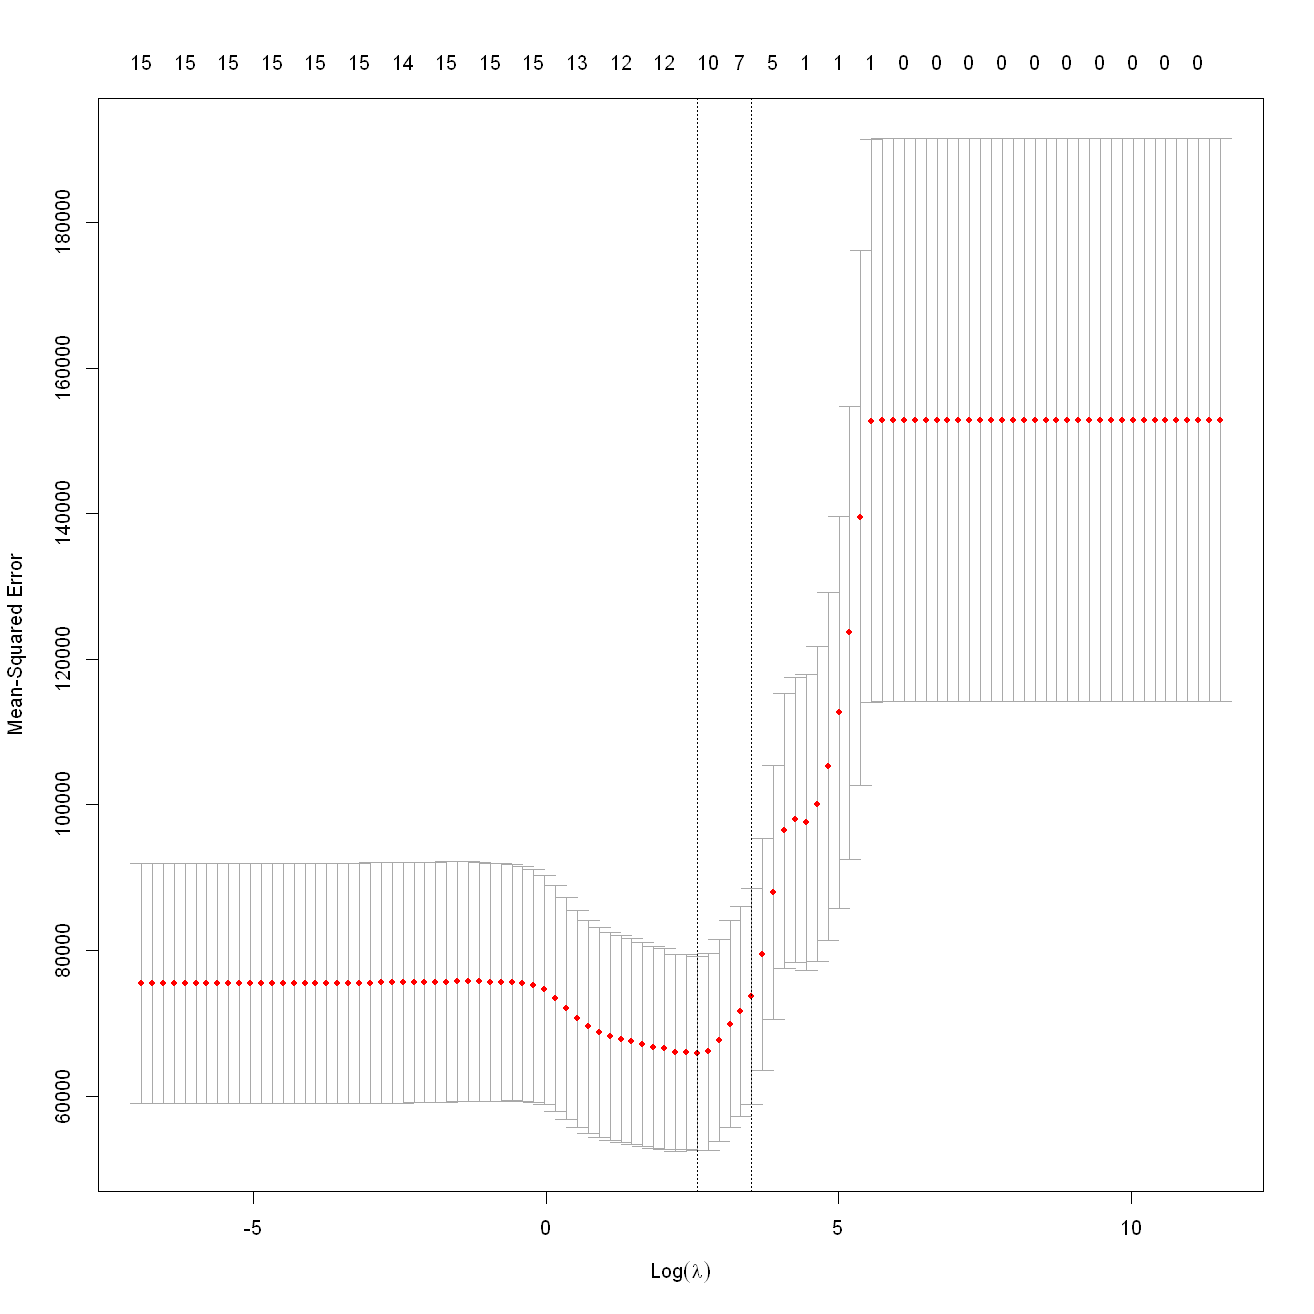

In [279]:
plot(lasso_cv)

#### Change of coefficients

The following graph shows how the coefficients are shrunken as the degree of regularization increased.

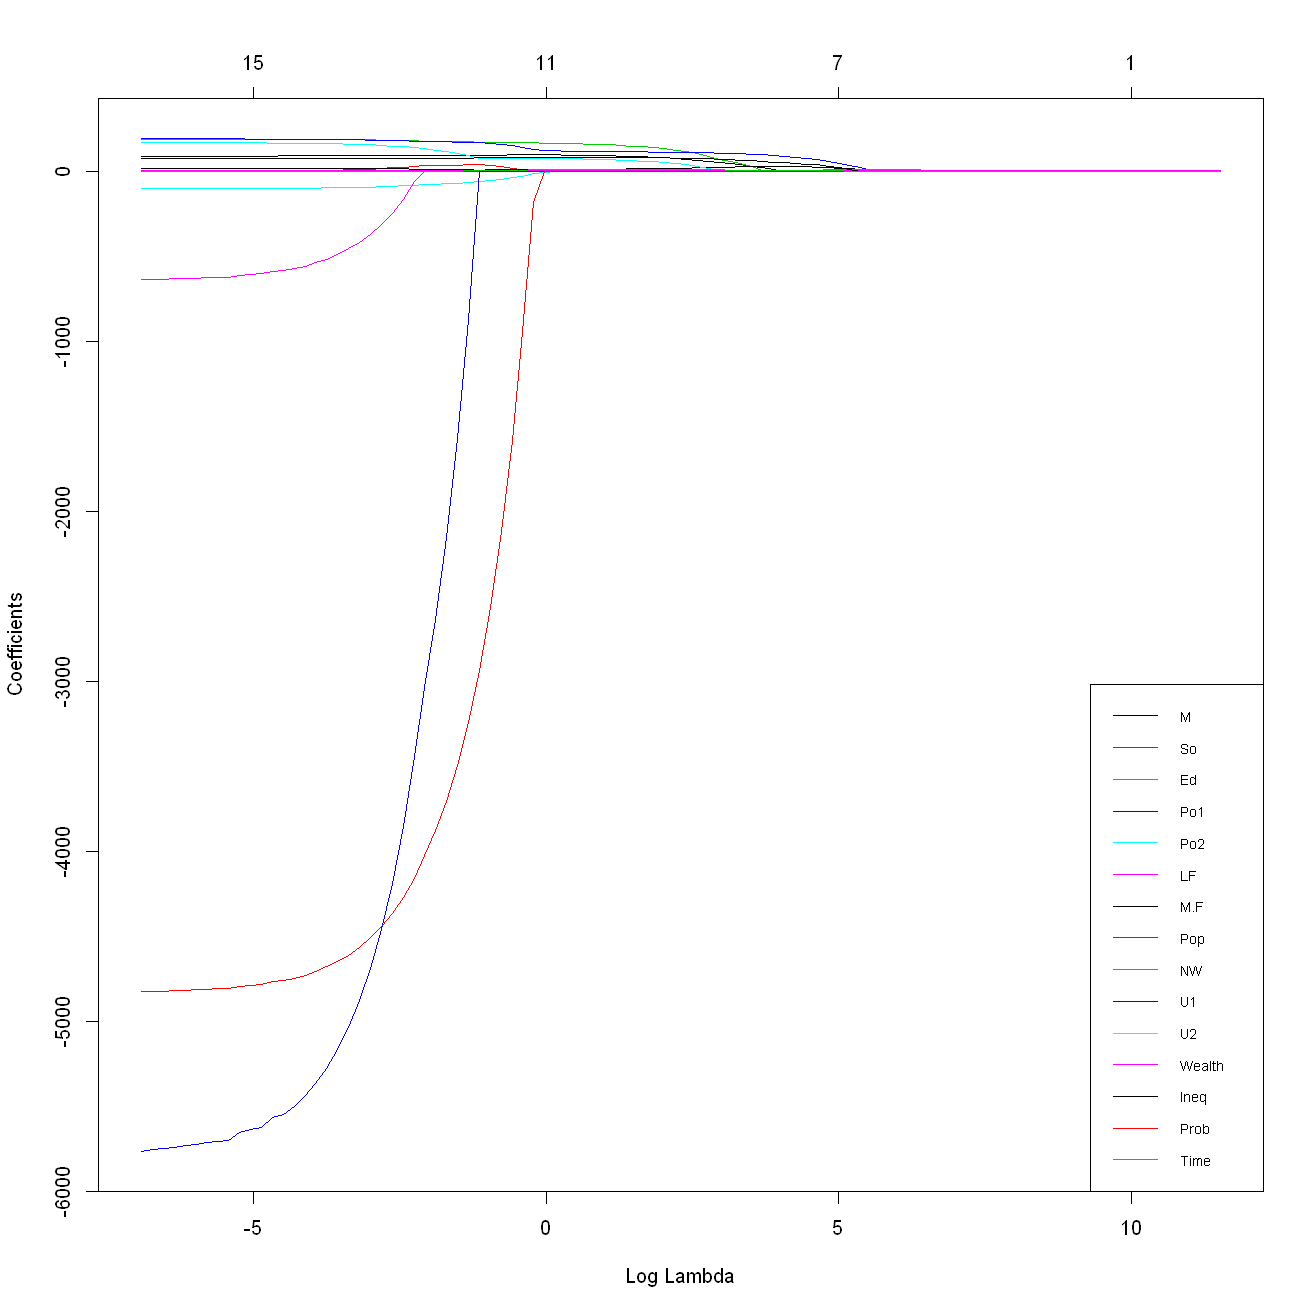

In [318]:
figsize <- 120
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)

res <- glmnet(crime_dta[, regr, with=FALSE] %>% as.matrix,
              crime_dta[, Crime] %>% as.matrix, 
              alpha = 1, lambda = lambda_vec, standardize = FALSE)
plot(res, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6, legend = regr, cex = .7)

### 4.2 Variance Inflation Factors

We turn to VIF to determine what variables are multicollinear and to be dropped. As we had conjectured in the previous sections, `Po2`, `Po1`, `Wealth`, `Ineq` are variables that exhibit the most multicollinearity. We already considered dropping them in section 3 so we will skip the analysis here.

In [328]:
library(car)
vif(benchmark_reg) %>% sort(decreasing=TRUE) %>% as.list()

$Po2
[1] 113.5593

$Po1
[1] 104.6587

$Wealth
[1] 10.53037

$Ineq
[1] 8.644528

$U1
[1] 6.063931

$So
[1] 5.342783

$U2
[1] 5.08888

$Ed
[1] 5.077447

$NW
[1] 4.674088

$M.F
[1] 3.785934

$LF
[1] 3.71269

$M
[1] 2.892448

$Prob
[1] 2.809459

$Time
[1] 2.713785

$Pop
[1] 2.536708

## 5. Model Comparison

We now have a model selected from an interpretive, sequential approach and a Lasso model. We'll do a leave-on-out CV with the linear model selected in section 3. To do so we use the `cv.lm` function in packages `DAAG`. 

Can the model in section 3 beat the Lasso model? Here's some comparison:

|                     | Interpretive | Lasso |
|---------------------|:------------:|:-------:|
| In-sample R Squared |     0.781    |  0.753  |
| CV Sum of Errors    |     72665    |  65871  |

While attaining similar in-sample fit, the CV error is lower for the Lasso model. So we will end up selecting it.

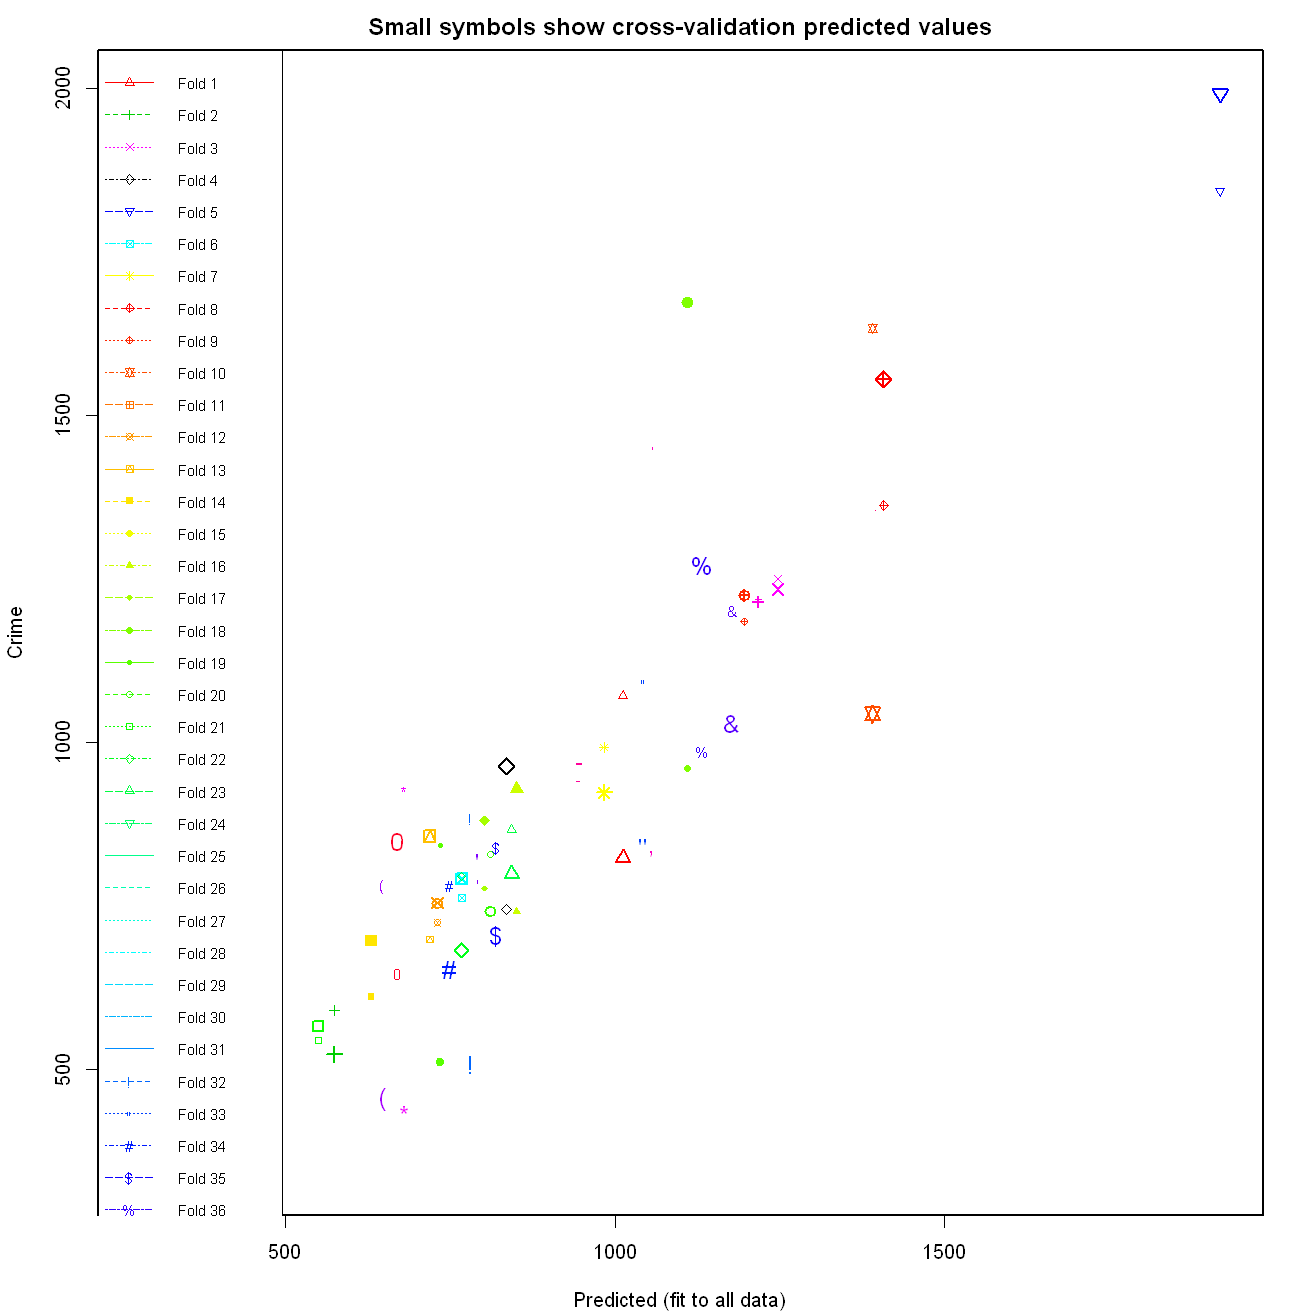

In [416]:
library(DAAG)
CV_res <- cv.lm(crime_dta, 
                formula(Crime ~ M + So + Ed + Po1 + LF + M.F + Pop + NW + U2 + Ineq + Prob + Time), 
                m=crime_dta[, .N], plotit=TRUE, printit=FALSE)

In [421]:
CV_res %>% attr(., 'ms')

[1] 72665

### 5.1 Residual QQ Plots

We also see that the Lasso model exhibits more normality than the interpretive model.

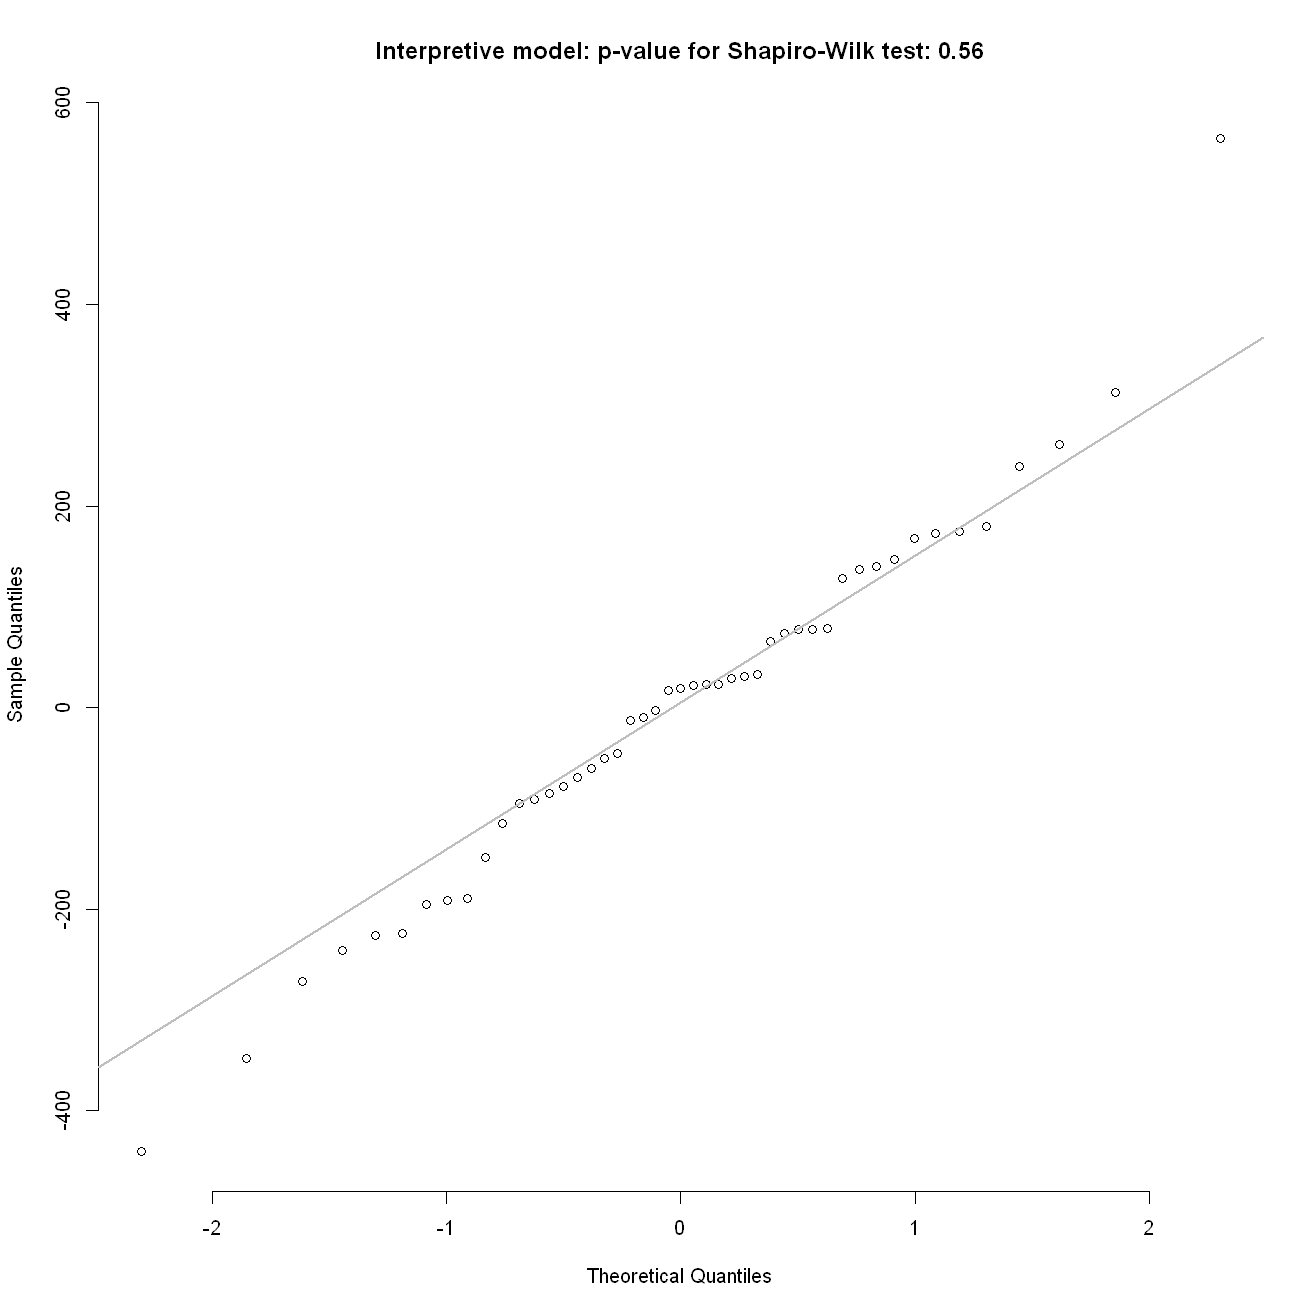

In [430]:
model_1 <- model_list[['Crime_drop_Po2_Wealth_U1']]

title <- paste0('Interpretive model: p-value for Shapiro-Wilk test: ', shapiro.test(model_1$resid)$p.value %>% round(2))
qqnorm(model_1$resid, pch = 1, main=title, frame = FALSE)
qqline(model_1$resid, col = "grey", lwd = 2)

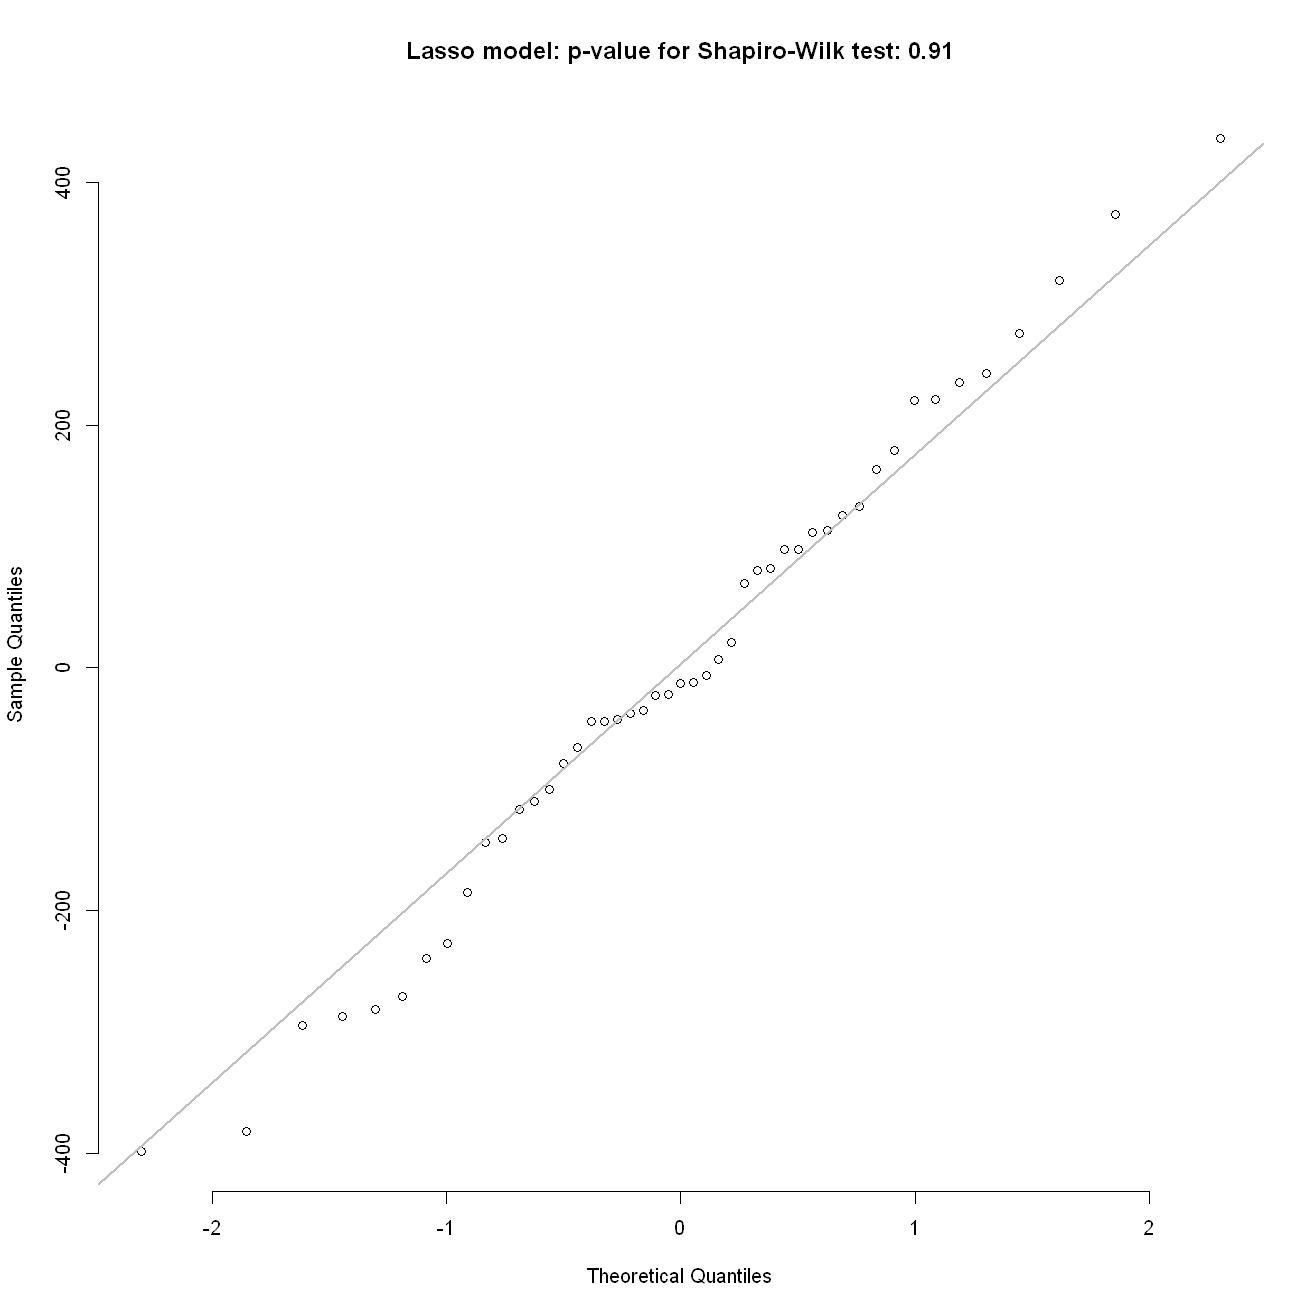

In [442]:
crime_dta[, lasso_pred:=predict(lasso_model, crime_dta[, regr, with = FALSE] %>% as.matrix)]
lasso_resid <- crime_dta[, Crime] - crime_dta[, lasso_pred]

title <- paste0('Lasso model: p-value for Shapiro-Wilk test: ', shapiro.test(lasso_resid)$p.value %>% round(2))
qqnorm(lasso_resid, pch = 1, main=title, frame = FALSE)
qqline(lasso_resid, col = "grey", lwd = 2)

### 5.2 Predictions

In [465]:
# Lasso
parm <- c(lasso_model$a0, lasso_model$beta %>% as.vector)
x <- c(1,14,0,10,12,15.5,.64,94,150,1.1,.12,3.6,3200,20.1,.04,39)
sum(parm*x)

[1] 904

In [467]:
x <- c(1,14,0,10,12,.64,94,150,1.1,3.6,20.1,.04,39)
sum(model_1 %>% coefficients * x)

[1] 1225